In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
auto = pd.read_csv('autoscout24.csv')
auto.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [6]:
#checking missing values 
auto.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [7]:
#removing the missing values
auto =auto.dropna(axis=0)

In [8]:
auto.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [9]:
auto.describe()

,mileage,price,hp,year
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


C:\Users\yussu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


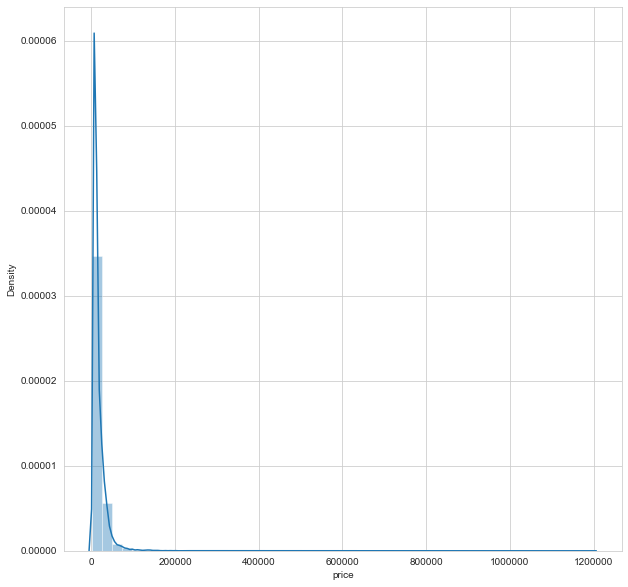

In [13]:
#lets check the distribution of the values of the price column
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(auto.price)
plt.ticklabel_format(style='plain')
plt.show()

In [14]:
#correlation among tll the features 
auto.corr()

,mileage,price,hp,year
mileage,1.000000,-0.303550,-0.014901,-0.678053
price,-0.303550,1.000000,0.746715,0.405698
hp,-0.014901,0.746715,1.000000,0.166900
year,-0.678053,0.405698,0.166900,1.000000


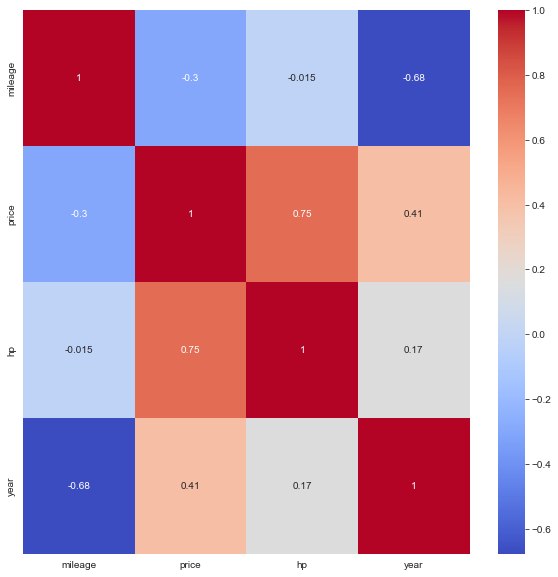

In [17]:
plt.figure(figsize=(10,10))
corr = auto.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

# Training a prediction model on car prices

In [18]:
#importing scikit-learn library to create the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [19]:
#selct the prediction target
y = auto.price

In [20]:
#select mileage, hp and year as features
X = auto[['mileage', 'hp', 'year']]

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

In [22]:
auto_model = DecisionTreeRegressor()

auto_model.fit(Xtrain, ytrain)
predictions = auto_model.predict(Xtest)

In [23]:
from sklearn.metrics import mean_absolute_error
auto_model.score(Xtest, predictions)

1.0

In [24]:
print("Making predictions for the following cars:")
print(X.head())
print("The predictions are")
print(auto_model.predict(X.head(10)))

Making predictions for the following cars:
   mileage     hp  year
0   235000  116.0  2011
1    92800  122.0  2011
2   149300  160.0  2011
3    96200  110.0  2011
4   156000  156.0  2011
The predictions are
[6800. 6877. 6900. 6950. 6950. 6800. 7990. 6972. 6980. 6990.]


# The model gives 100% accuracy on the test set